### РОССИЙСКИЙ УНИВЕРСИТЕТ ДРУЖБЫ НАРОДОВ

#### Факультет физико-математических и естественных наук  
#### Кафедра информационных технологий 

## ОТЧЕТ ПО ЛАБОРАТОРНОЙ РАБОТЕ № 4


### Дисциплина: Интеллектуальный анализ данных

## Москва 2022
***

### Вариант № 16

# 1.Считайте из заданного набора данных репозитария UCI значения трех признаков и метки класса. 

In [ ]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [2]:
massiv = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", delimiter=";")
massiv

,density,sulphates,alcohol,quality
0,0.99780,0.56,9.4,5
1,0.99680,0.68,9.8,5
2,0.99700,0.65,9.8,5
3,0.99800,0.58,9.8,6
4,0.99780,0.56,9.4,5
...,...,...,...,...
1594,0.99490,0.58,10.5,5
1595,0.99512,0.76,11.2,6
1596,0.99574,0.75,11.0,6
1597,0.99547,0.71,10.2,5


# 2.	Если среди меток класса имеются пропущенные значения, то удалите записи с пропущенными метками класса. Если в признаках имеются пропущенные значения, то замените пропущенные значения, используя метод, указанный в индивидуальном задании. Если количество различных меток классов превышает 4, то уменьшите количество классов.

In [4]:
data=massiv
data = data.replace('?', np.NaN)
data.isna().sum()

density      0
sulphates    0
alcohol      0
quality      0
dtype: int64

In [5]:
import matplotlib.pyplot as plt
(data['quality'].value_counts())

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [6]:
data['quality']=data['quality'].apply(lambda x:x%4 if x else x)

# 3.Нормализуйте признаки набора данных методом, указанным в индивидуальном задании.

In [11]:
from sklearn.preprocessing import MinMaxScaler
np.set_printoptions(precision=3)
X = data.drop(['quality'],axis=1)
scaler = MinMaxScaler(feature_range=(-1, 1)) # значения признаков от 1 до 5
normalizedX = scaler.fit_transform(X)

print(normalizedX[0:5,:])

[[ 0.135 -0.725 -0.692]
 [-0.012 -0.581 -0.569]
 [ 0.018 -0.617 -0.569]
 [ 0.164 -0.701 -0.569]
 [ 0.135 -0.725 -0.692]]


# 4.Визуализируйте набор данных в виде точек трехмерного пространства с координатами, соответствующими трем признакам, отображая точки различных классов разными цветами. Подпишите оси и рисунок, создайте легенду набора данных. 

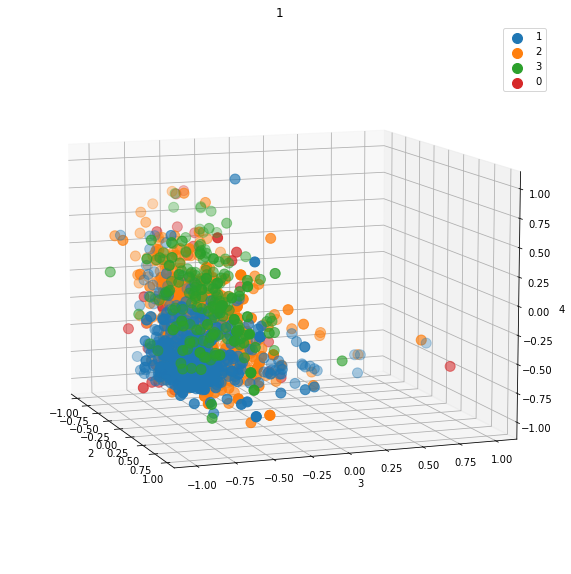

In [13]:
from mpl_toolkits import mplot3d
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(12,10))
ax = plt.axes(projection='3d')
y = data['quality'].astype(int)
for i in (y.unique()):
    row_ix = np.where(y== i)
    a=normalizedX[row_ix, 0]
    b=normalizedX[row_ix, 1]
    c=normalizedX[row_ix, 2]
    ax.scatter(a, b, c,s=100,label=i )
plt.title('1')
ax.set_xlabel('2')
ax.set_ylabel('3')
ax.set_zlabel('4')
plt.legend()
ax.view_init( azim=-20, elev=10 );

# 5.Используя алгоритм снижения размерности данных, указанный в индивидуальном задании, уменьшите размерность признакового пространства до двух и визуализируйте набор данных в виде точек на плоскости, отображая точки различных классов разными цветами. Подпишите оси и рисунок, создайте легенду набора данных. 

0    0.076807
1    0.041210
2    0.107517
dtype: float64


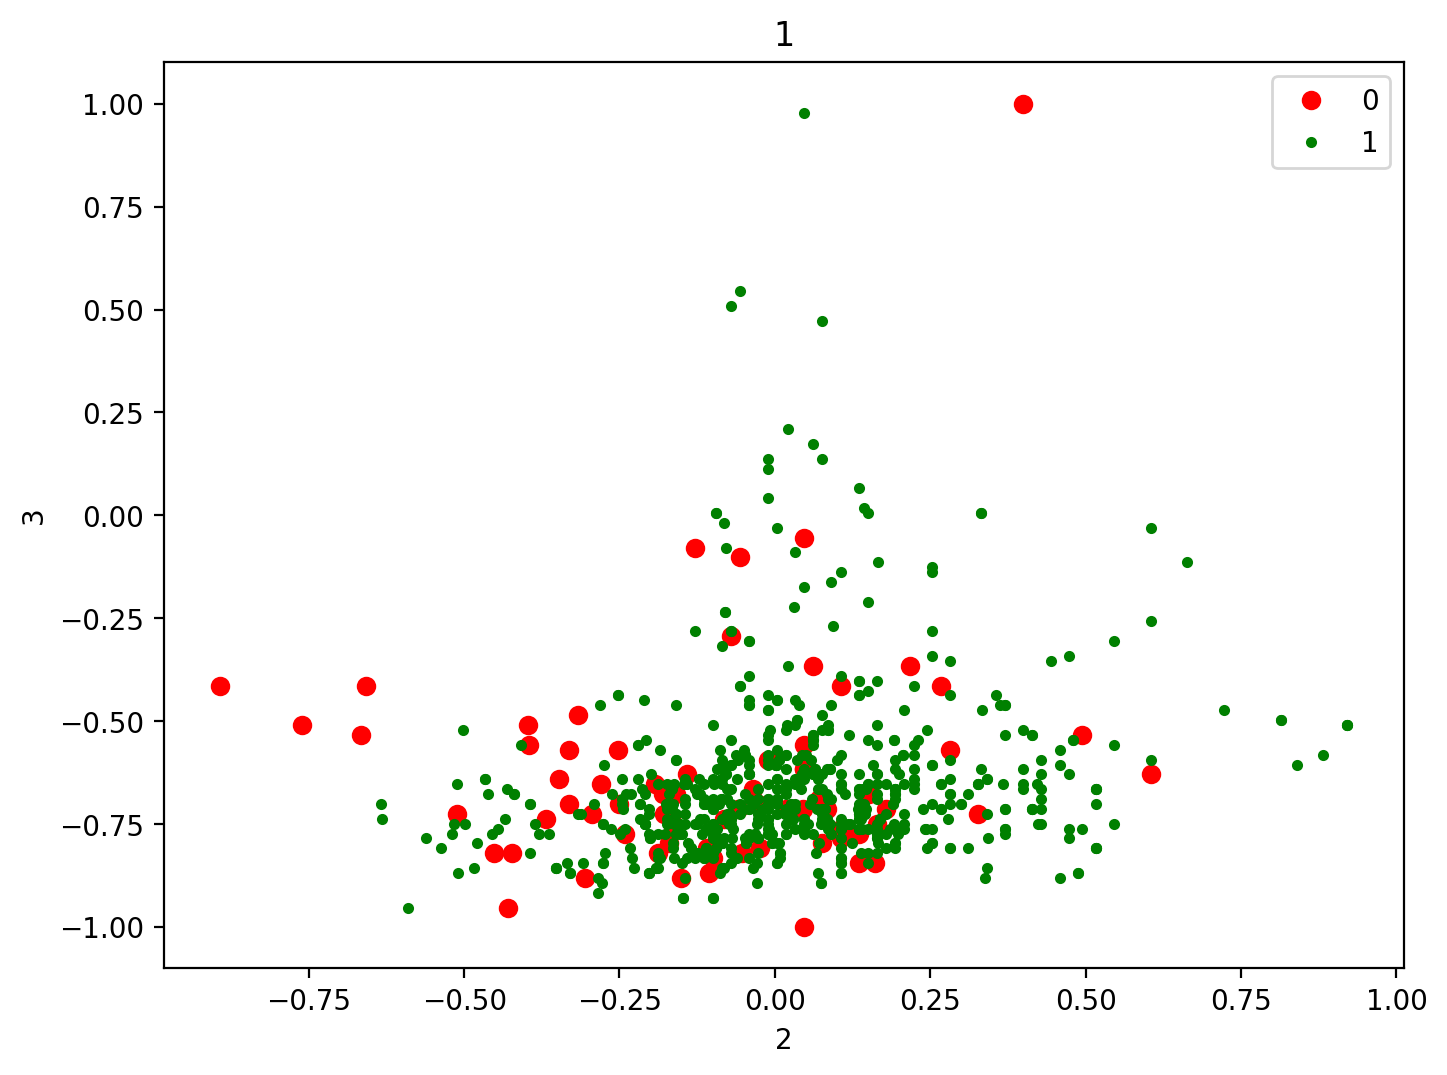

In [15]:
print (pd.DataFrame(normalizedX).var())
from sklearn.decomposition import PCA 
plt.figure( figsize=(8, 6), dpi=200 )
plt.plot(normalizedX[:,1:][y==0,0],
         normalizedX[:,1:][y==0,1],"ro",label='0') 
plt.plot(normalizedX[:,1:][y==1,0],
         normalizedX[:,1:][y==1,1],"g.",label='1') 
plt.title('1')
plt.xlabel('2')
plt.ylabel('3')
plt.legend()
plt.legend()

# 6.Используя разделение набора данных из двух признаков на обучающую и тестовую выборки в соотношении 75% на 25%, проведите классификацию тестовой выборки с помощью метода К ближайших соседей для различных значений К и определите оптимальное значение параметра К с минимальной долей ошибок. 

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(normalizedX[:,1:], y, test_size=0.25, random_state=666)

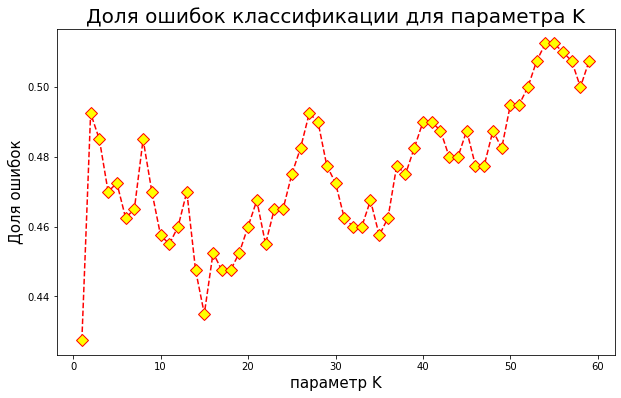

In [18]:
from sklearn.neighbors import KNeighborsClassifier
error_rate = []
for i in range(1,60):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))
plt.figure(figsize=(10,6))
plt.plot(range(1,60),error_rate,color='red', linestyle='dashed', marker='D',
         markerfacecolor='yellow', markersize=8)
plt.title('Доля ошибок классификации для параметра K', fontsize=20)
plt.xlabel('параметр K',fontsize=15)
plt.ylabel('Доля ошибок',fontsize=15);

# 7.Для найденного значения K постройте и выведите на экран отчет о классификации и матрицу ошибок.

In [22]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)

In [23]:
from sklearn.metrics import classification_report,confusion_matrix
conf_mat=confusion_matrix(y_test,y_pred)
print(conf_mat)
print(classification_report(y_test,y_pred))

[[  1   3   8   1]
 [  9 103  46  14]
 [  5  47 100  11]
 [  1  15  11  25]]
              precision    recall  f1-score   support

           0       0.06      0.08      0.07        13
           1       0.61      0.60      0.61       172
           2       0.61      0.61      0.61       163
           3       0.49      0.48      0.49        52

    accuracy                           0.57       400
   macro avg       0.44      0.44      0.44       400
weighted avg       0.58      0.57      0.57       400



# 8. Создайте модели классификации точек набора данных из трех признаков на базе следующих классификаторов:
#* наивного байесовского классификатора  
#* классификатора метода К ближайших соседей для значения К, определенного в п. 6.

In [25]:
from sklearn.naive_bayes import GaussianNB
nbc = GaussianNB()

In [26]:
knn = KNeighborsClassifier(n_neighbors=1) 

# 9.  Используя указанный в индивидуальном задании метод валидации модели, проведите для набора данных из трех признаков оценку качества классификаторов из п. 8 относительно показателя, указанного в индивидуальном задании, и выведите на экран среднее значение и дисперсию этого показателя.

In [30]:
# K-fold Cross-Validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit
kfold = ShuffleSplit(n_splits=5, test_size=0.25)
results_kfold = cross_val_score(nbc, X, y, scoring="f1",cv=kfold)
print("Доля верных ответов (mean): %.2f%%" % (results_kfold.mean()*100.0)) 
print("Доля верных ответов (std): %.2f%%" % (results_kfold.var()*100.0)) 

Доля верных ответов (mean): 54.90%
Доля верных ответов (std): 0.01%


In [31]:
results_kfold = cross_val_score(knn, X, y,scoring="f1", cv=kfold)
print("Доля верных ответов (mean): %.2f%%" % (results_kfold.mean()*100.0)) 
print("Доля верных ответов (std): %.2f%%" % (results_kfold.std()*100.0)) 

Доля верных ответов (mean): 56.35%
Доля верных ответов (std): 1.45%


# 10. Определите, какой из классификаторов позволяет получить более высокое среднее значение показателя классификации, проведите классификацию точек набора данных этим классификатором и визуализируйте набор данных в виде точек трехмерного пространства с координатами, соответствующими трем признакам, отображая точки различных прогнозируемых классов разными цветами. Подпишите оси и рисунок, создайте легенду набора данных. 

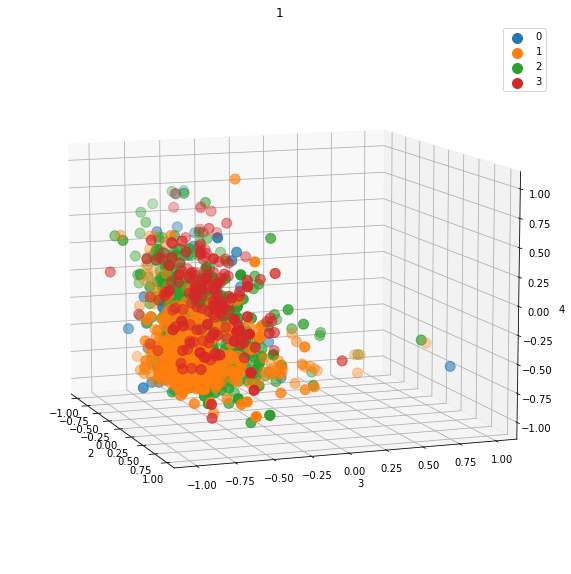

In [32]:
from mpl_toolkits import mplot3d
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(12,10))
ax = plt.axes(projection='3d')
from sklearn.naive_bayes import GaussianNB
knn = KNeighborsClassifier(n_neighbors=1) 
knn.fit(normalizedX,y);
y = knn.predict(normalizedX)
for i in (np.unique(y)):
    row_ix = np.where(y== i)
    a=normalizedX[row_ix, 0]
    b=normalizedX[row_ix, 1]
    c=normalizedX[row_ix, 2]
    ax.scatter(a, b, c,s=100,label=i )
plt.title('1')
ax.set_xlabel('2')
ax.set_ylabel('3')
ax.set_zlabel('4')
plt.legend()
ax.view_init( azim=-20, elev=10 );